## 대구의 인구는 어떻게 줄어 들고 있을까? 연령대별 인구변화 추이는 어떻게 될까?

## 2015년도 ~ 2020년도의 대구의 데이터를 분석해보았다.
 - 다시 수도권 몰리는 사람들…40년만에 비수도권 인구 추월
 - https://www.mk.co.kr/news/economy/view/2020/06/664538/
 - 수도권으로 몰리는 인구, 대표적인 도시로 영남권의 대구가 대표적인 인구유출이 상위도시로 꼽혔다.

In [18]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns

D201506 = pd.read_csv('201506_201506_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201512 = pd.read_csv('201512_201512_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201606 = pd.read_csv('201606_201606_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201612 = pd.read_csv('201612_201612_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201706 = pd.read_csv('201706_201706_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201712 = pd.read_csv('201712_201712_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201806 = pd.read_csv('201806_201806_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201812 = pd.read_csv('201812_201812_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201906 = pd.read_csv('201906_201906_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')
D201912 = pd.read_csv('201912_201912_연령별인구현황_연간.csv',thousands=',',encoding = 'cp949')
D202006 = pd.read_csv('202006_202006_연령별인구현황_월간.csv',thousands=',',encoding = 'cp949')

################ 데이터 리스트에 담는다.
D_list=[D201506,D201512,D201606,D201612,D201706,D201712,D201806,D201812,D201906,D201912,D202006]
D_list_s=[]
D_list_b=[]

print(D202006)

행정구역  2020년06월_계_총인구수  2020년06월_계_연령구간인구수  \
0     대구광역시  (2700000000)          2427954             2427954   
1   대구광역시 중구 (2711000000)            76984               76984   
2   대구광역시 동구 (2714000000)           342627              342627   
3   대구광역시 서구 (2717000000)           172802              172802   
4   대구광역시 남구 (2720000000)           147482              147482   
5   대구광역시 북구 (2723000000)           438608              438608   
6  대구광역시 수성구 (2726000000)           426919              426919   
7  대구광역시 달서구 (2729000000)           565378              565378   
8  대구광역시 달성군 (2771000000)           257154              257154   

   2020년06월_계_0~9세  2020년06월_계_10~19세  2020년06월_계_20~29세  2020년06월_계_30~39세  \
0           183631             230453             322265             300366   
1             5342               5097              11866              11041   
2            25923              27046              41737              44676   
3             7941              11362       

### 각 데이터들(6개월 단위)을 불러 들인다. 

In [19]:
for a in D_list:
    D_list1=np.array(a)
    D_list11=np.delete(D_list1,(0), axis=1)
    D_list_s.append(D_list11)

#### 데이터분석에 불필요한 행(행정구역)을 for문을 통하여 제거.
- D_list_s : 수식에 불필요한 행을 없앤 행렬리스트

In [20]:
for a in range(0,10):
    b=np.subtract(D_list_s[a],D_list_s[a+1])
    D_list_b.append(-b)
print(len(D_list_b))

10


- D_list_b : 얻고 싶은 데이터를 수식을 통해 얻은 행렬리스트.

In [21]:
df1=[]
for i in range(0,10): 
    df =pd.DataFrame(D_list_b[i],columns=["총계","연령구간인구수","0~9","10~19","20~29","30~39","40~49","50~59","60~69","70~79","80~89","90~99","100세 이상"],index=["대구","중구","동구","서구","남구","북구","수성구","달서구","달성군"])
    df1.append(df)
df1

[        총계 연령구간인구수   0~9  10~19 20~29  30~39  40~49 50~59 60~69  70~79 80~89  \
 대구   -3308   -3308  -395  -8648  1512  -5038  -3962  3162  8811  -1216  2219   
 중구     135     135     9   -177    62     14     35   -59   207    -80   117   
 동구     -14     -14    -7  -1026   192   -689   -294   190  1375   -194   401   
 서구   -1874   -1874  -126   -959  -156   -589  -1037   -18   935   -140   222   
 남구   -1316   -1316  -149   -572  -130   -510   -413  -292   605   -130   252   
 북구    -328    -328  -152  -1654   414  -1032   -407   902  1392   -136   313   
 수성구   -361    -361   -52  -1354   473   -895   -592   526  1365   -259   362   
 달서구  -3591   -3591  -675  -2561   150  -2174  -1530  1001  2037   -274   370   
 달성군   4041    4041   757   -345   507    837    276   912   895     -3   182   
 
     90~99 100세 이상  
 대구    224      23  
 중구      4       3  
 동구     32       6  
 서구     -8       2  
 남구     19       4  
 북구     30       2  
 수성구    63       2  
 달서구    64       1  

#### 만들어진 행렬리스트를 얻고싶은 데이터 프레임으로 변환하였다.

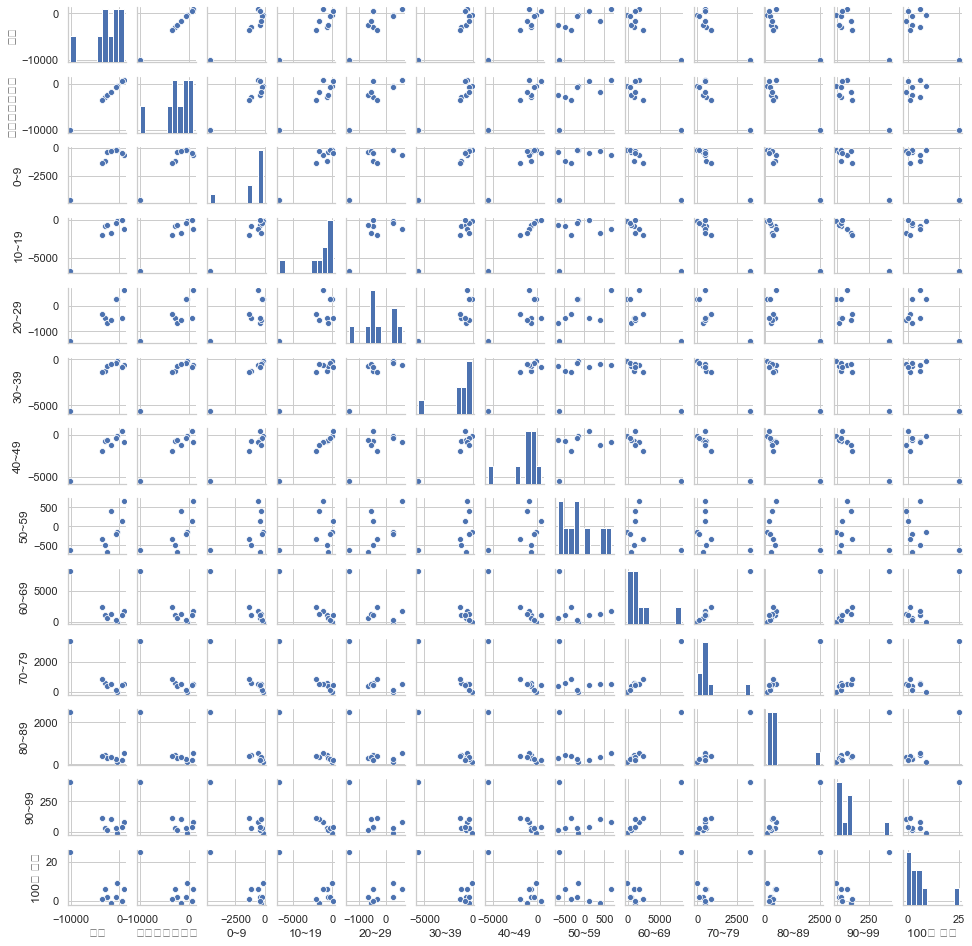

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[["총계","연령구간인구수","0~9","10~19","20~29","30~39","40~49","50~59","60~69","70~79","80~89","90~99","100세 이상"]], height=1)
plt.show()

#### 각 연령별로 데이터의 상관관계를 찾는다.
- 60대(노년층) 이상에서는 상관관계가 높은것으로 판단된다.
- 50대(청년층) 이하에서도 상관관계가 높은것으로 판단된다.
- 두 층간의 구분이 뚜렷한 것으로 판명된다. 

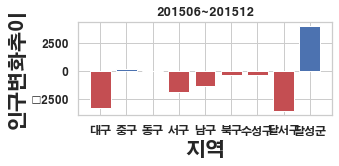

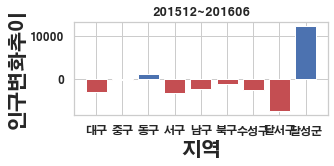

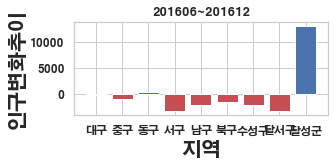

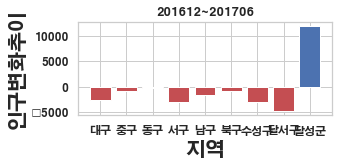

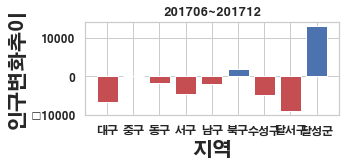

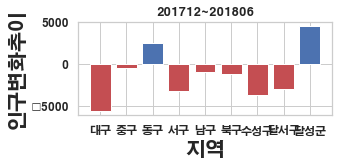

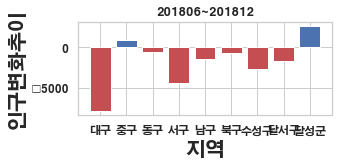

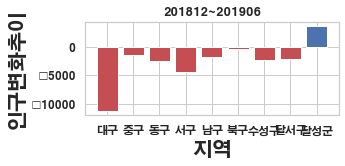

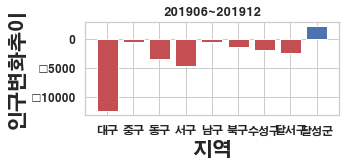

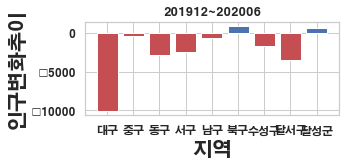

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


path = '/Windows/Fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
x_set=np.array(df.index)
day=["201506~201512","201512~201606","201606~201612","201612~201706","201706~201712","201712~201806","201806~201812","201812~201906","201906~201912","201912~202006"]


for i in range(0,10):
    
    prob=np.array(df1[i]["총계"])
    prob1=np.zeros(9,)
    prob2=np.zeros(9,)
    for a in range(0,9):

        if prob[a]>=0:
            prob1[a]=prob[a]

        else:
            prob1[a]=0

    for b in range(0,9):

        if prob[b]<0:
            prob2[b]=prob[b]
        else:
            prob2[b]=0



    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(5, 2, i+1)


    ax.bar(x_set, prob1)
    ax.bar(x_set, prob2,color='r')
    ax.set_xlabel('지역',size=20)
    ax.set_ylabel('인구변화추이',size=20)
    plt.title(day[i])
    ax.plot()



plt.show()

### 각 구별 6개월 단위의 인구 변화 추이
- 달성군은 2019.12 까지의 인구가 지속해서 증가하는 추이를 보인다.
- 하지만 다른 구는 지속해서 감소하는 추이를 보임.
- 영남일보 기사 인용. https://www.yeongnam.com/web/view.php?key=20200211010001782

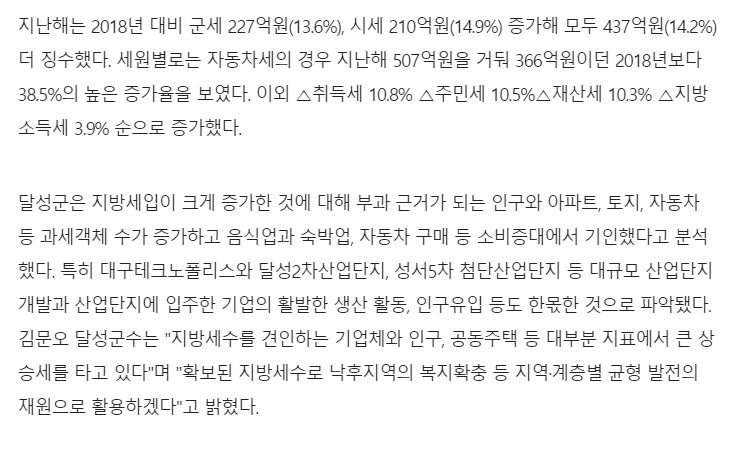

In [24]:
from PIL import Image
Image.open('영남일보인용.JPG')

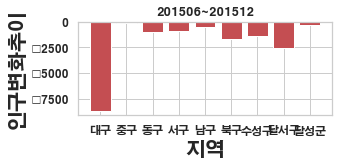

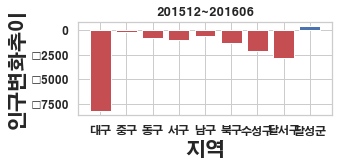

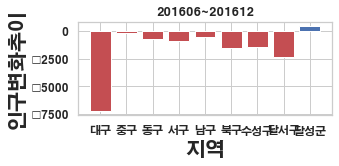

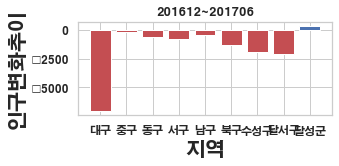

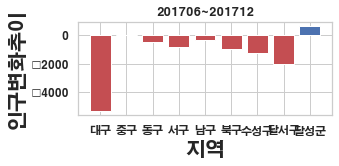

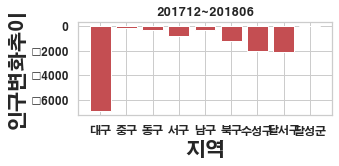

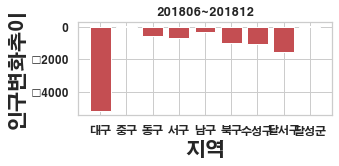

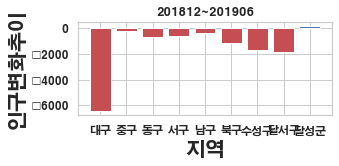

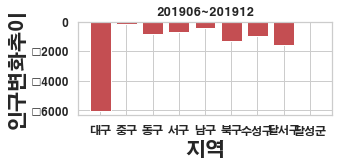

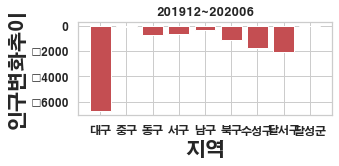

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


path = '/Windows/Fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
x_set=np.array(df.index)
day=["201506~201512","201512~201606","201606~201612","201612~201706","201706~201712","201712~201806","201806~201812","201812~201906","201906~201912","201912~202006"]


for i in range(0,10):
    
    prob=np.array(df1[i]["10~19"])
    prob1=np.zeros(9,)
    prob2=np.zeros(9,)
    for a in range(0,9):

        if prob[a]>=0:
            prob1[a]=prob[a]

        else:
            prob1[a]=0

    for b in range(0,9):

        if prob[b]<0:
            prob2[b]=prob[b]
        else:
            prob2[b]=0



    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(5, 2, i+1)


    ax.bar(x_set, prob1)
    ax.bar(x_set, prob2,color='r')
    ax.set_xlabel('지역',size=20)
    ax.set_ylabel('인구변화추이',size=20)
    plt.title(day[i])
    ax.plot()



plt.show()

In [26]:
df2=[]
for i in range(0,10): 
    df =pd.DataFrame(D_list_b[i],columns=["총계","연령구간인구수","0~9","10~19","20~29","30~39","40~49","50~59","60~69","70~79","80~89","90~99","100세 이상"],index=["대구","중구","동구","서구","남구","북구","수성구","달서구","달성군"])
    dfT = df.T
    df2.append(dfT)
df2

[            대구    중구     동구     서구     남구     북구    수성구    달서구   달성군
 총계       -3308   135    -14  -1874  -1316   -328   -361  -3591  4041
 연령구간인구수  -3308   135    -14  -1874  -1316   -328   -361  -3591  4041
 0~9       -395     9     -7   -126   -149   -152    -52   -675   757
 10~19    -8648  -177  -1026   -959   -572  -1654  -1354  -2561  -345
 20~29     1512    62    192   -156   -130    414    473    150   507
 30~39    -5038    14   -689   -589   -510  -1032   -895  -2174   837
 40~49    -3962    35   -294  -1037   -413   -407   -592  -1530   276
 50~59     3162   -59    190    -18   -292    902    526   1001   912
 60~69     8811   207   1375    935    605   1392   1365   2037   895
 70~79    -1216   -80   -194   -140   -130   -136   -259   -274    -3
 80~89     2219   117    401    222    252    313    362    370   182
 90~99      224     4     32     -8     19     30     63     64    20
 100세 이상     23     3      6      2      4      2      2      1     3,
             대구    

#### 기존의 데이터를 지역별 데이터를 보기 위해 transform 을 진행하였다.
- 행열의 위치를 바꾸어 구 별로 연령대의 증감추이를 표현.

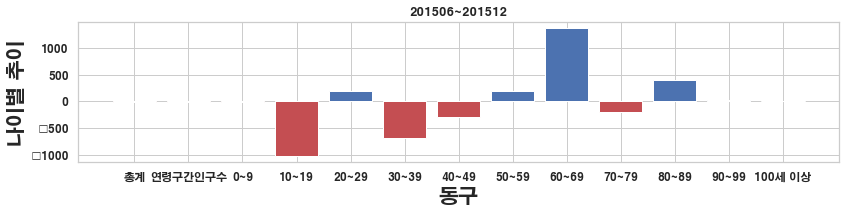

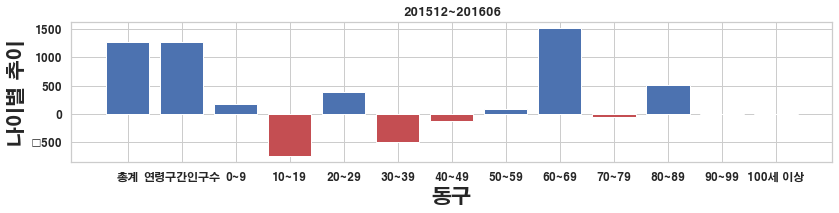

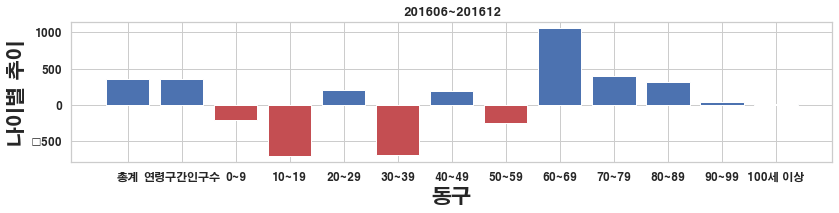

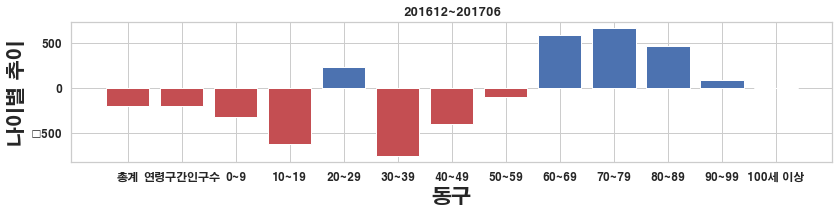

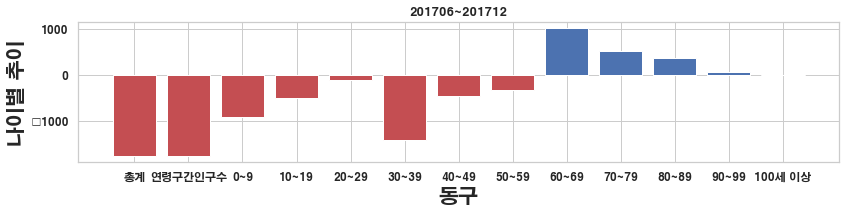

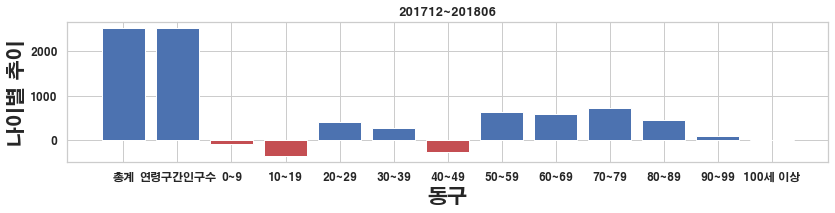

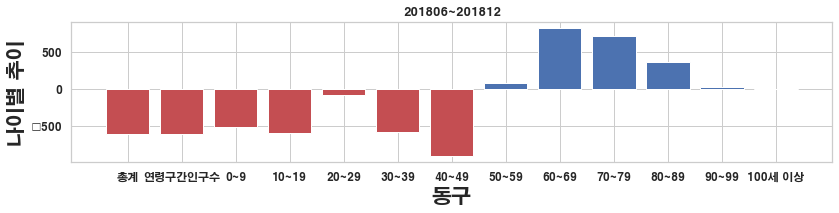

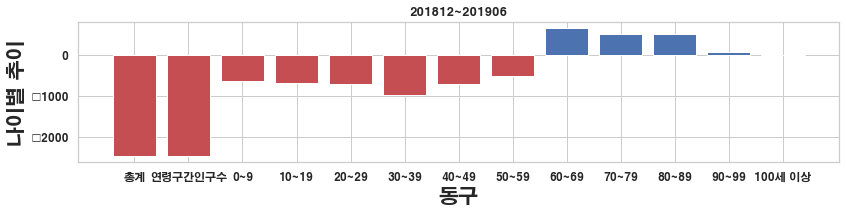

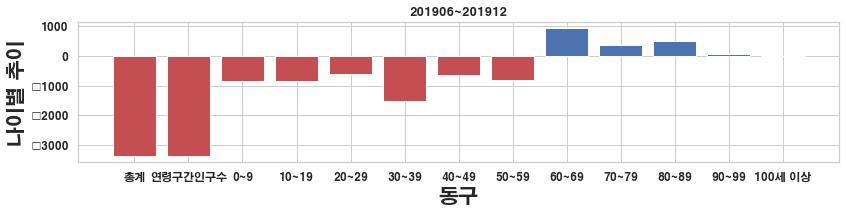

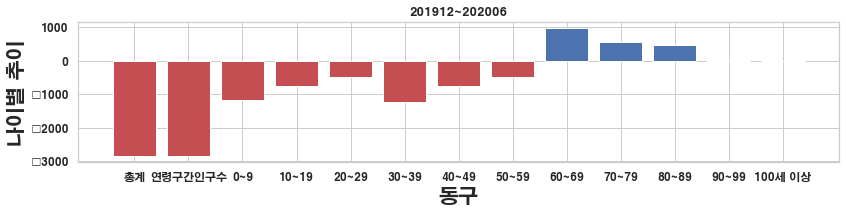

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


path = '/Windows/Fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
x_set=np.array(dfT.index)
day=["201506~201512","201512~201606","201606~201612","201612~201706","201706~201712","201712~201806","201806~201812","201812~201906","201906~201912","201912~202006"]


for i in range(0,10):
    
    prob=np.array(df2[i]["동구"])
    prob1=np.zeros(13,)
    prob2=np.zeros(13,)
    for a in range(0,13):

        if prob[a]>=0:
            prob1[a]=prob[a]

        else:
            prob1[a]=0

    for b in range(0,13):

        if prob[b]<0:
            prob2[b]=prob[b]
        else:
            prob2[b]=0



    fig = plt.figure(figsize=(30, 15))
    ax = fig.add_subplot(5, 2, i+1)


    ax.bar(x_set, prob1)
    ax.bar(x_set, prob2,color='r')
    ax.set_xlabel('동구',size=20)
    ax.set_ylabel('나이별 추이',size=20)
    plt.title(day[i])
    ax.plot()



plt.show()

#### 동구의 연도별, 나이별 인구 변화 추이
- 동구는 지속해서 감소하는 추세를 보임. 0~50대 까지 15년도 부터 감소하는 추세.
- 60대 이상은 지속해서 증가하는 추세를 보임.
- 이것으로 추론해볼때 젊은층, 즉 아동, 청년, 장년층은 대구 내에서의 경제가 침체되어 일자리가 없다고 판단되기 때문에 빠져나간 것으로 보여진다.
- 하지만 노년층의 경우, 은퇴 후 타지에서 고향으로 돌아왔을 확률이 높다고 판단된다.
- 대구가 꾸준히 인구가 감소되고 있는 현상이 지속되어지고 있음.

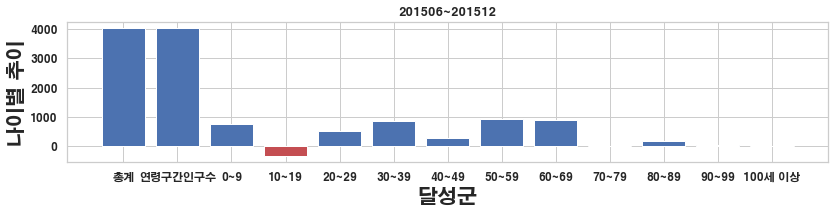

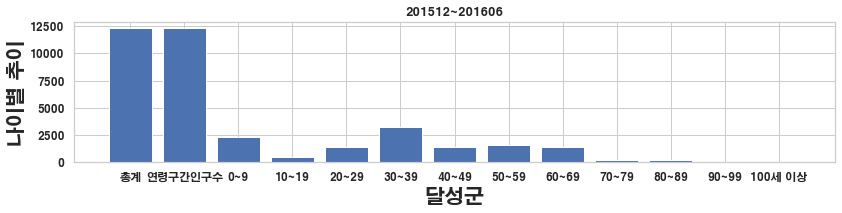

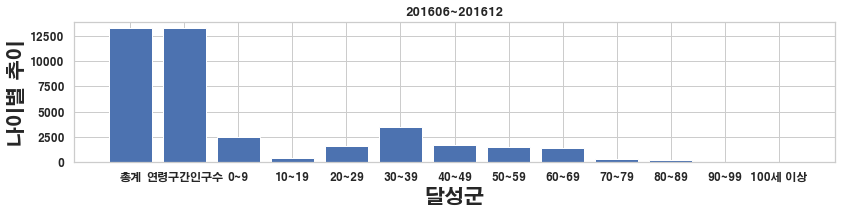

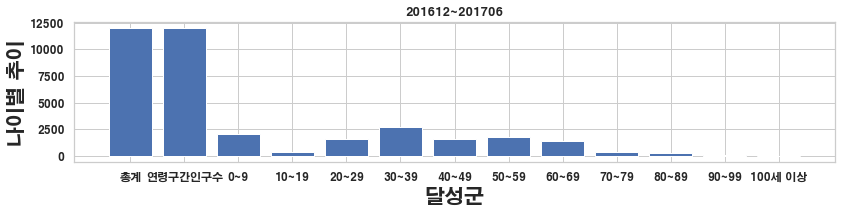

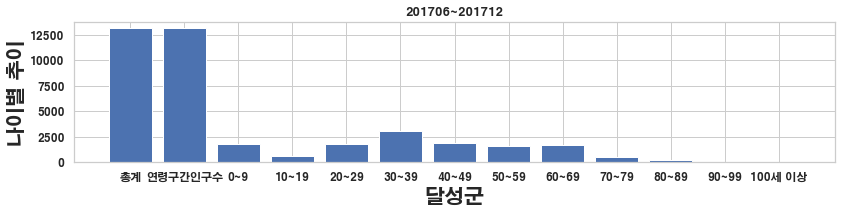

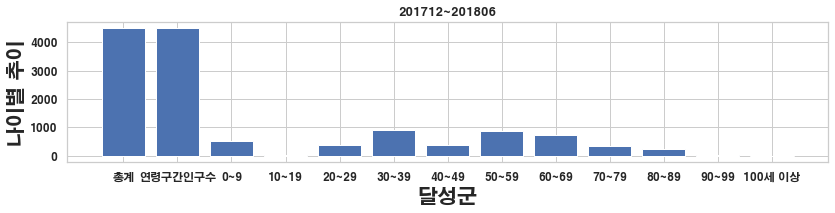

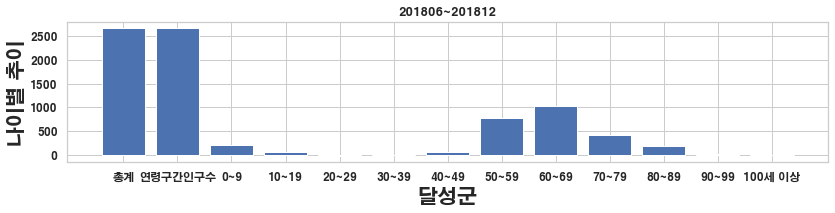

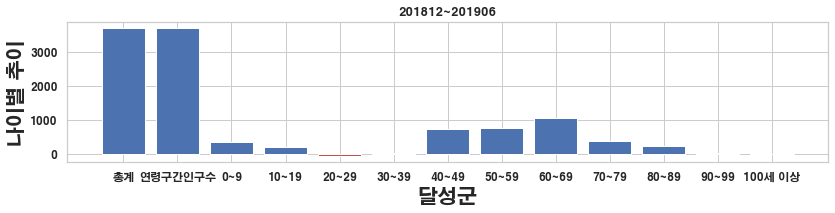

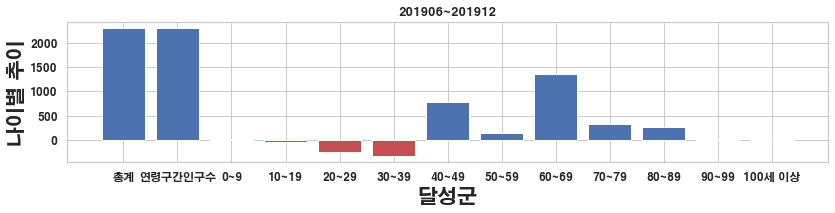

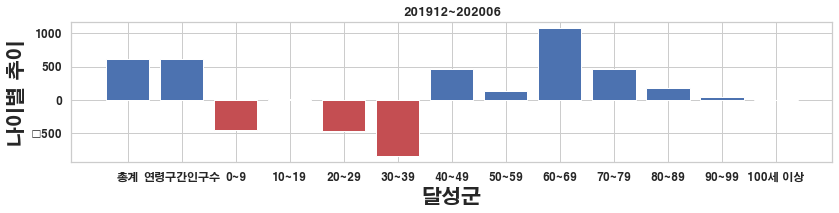

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


path = '/Windows/Fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
x_set=np.array(dfT.index)
day=["201506~201512","201512~201606","201606~201612","201612~201706","201706~201712","201712~201806","201806~201812","201812~201906","201906~201912","201912~202006"]


for i in range(0,10):
    
    prob=np.array(df2[i]["달성군"])
    prob1=np.zeros(13,)
    prob2=np.zeros(13,)
    for a in range(0,13):

        if prob[a]>=0:
            prob1[a]=prob[a]

        else:
            prob1[a]=0

    for b in range(0,13):

        if prob[b]<0:
            prob2[b]=prob[b]
        else:
            prob2[b]=0



    fig = plt.figure(figsize=(30, 15))
    ax = fig.add_subplot(5, 2, i+1)


    ax.bar(x_set, prob1)
    ax.bar(x_set, prob2,color='r')
    ax.set_xlabel('달성군',size=20)
    ax.set_ylabel('나이별 추이',size=20)
    plt.title(day[i])
    ax.plot()



plt.show()

#### 달성군의 연도별, 나이별 인구 변화 추이
- 달성군에서는 지속해서 유일하게 인구가 증가하였다.
- 하지만 청년층의 경우엔 2019년도 부터 지속해서 감소하는 추세를 보였다.

## 달성군의 인구가 증가한 이유는 무엇일까?

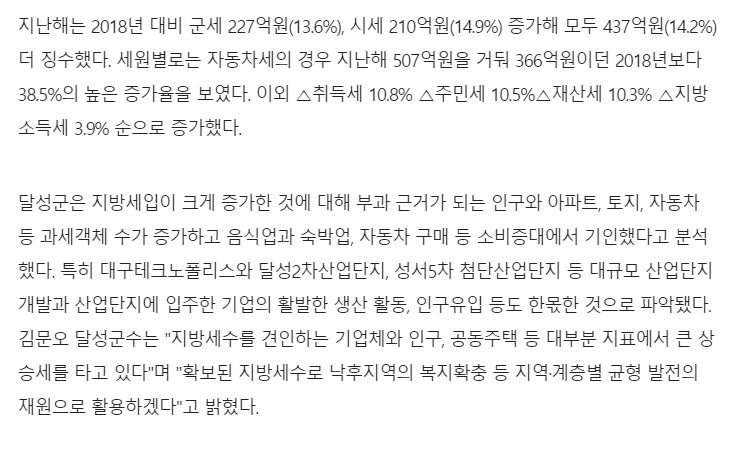

In [29]:
from PIL import Image
Image.open('영남일보인용.JPG')

### 달성군의 인구가 증가한 이유
-  (영남일보 인용)대구 달성군의 주머니가 해마다 두툼해지고 있다. 도시 기능 확장에 따른 아파트 분양과 공단 조성 등 지역개발 호재 영향 탓이다.

## **결론**
#### 대구의 인구는 15년도부터 시작하여 계속해서 감소하는 추세를 보이고 있다. 이러한 이유중 하나가 경제침체의 이유도 있는것으로 판단된다.
#### 특히 청년층의 인구가 눈에 띌 정도로 감소하는 경향을 보이고 있는데 이러한 이유는 청년층의 취업을 위한 영향도 있다고 보인다.
#### 현상황의 대구는 일자리가 많지않고 또한 연봉이 높지 않아 눈을 다른 지역으로 돌리는 경향이 높다.
#### 물론 지역경제활성화를 위한 정책과 노력이 계속되고 있지만 청년층의 유출을 막기위해선 일자리가 늘어야 할 것으로 보이고
#### 지역경제의 활성화가 이루어져야 연봉, 물가 등이 올라갈 것이다.
#### 대구는 타 지역에 비해 물가가 낮은편에 속하는데 이는 대구지역경제가 활성화 되지 않기 때문에 물가가 낮은것으로 판단된다